In [71]:
import pandas as pd  
import numpy as np 
from textblob import TextBlob
# Let's build a word cloud looking at the 'Summary' text
from wordcloud import WordCloud
from wordcloud import STOPWORDS

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import opinion_lexicon
from nltk.tokenize import TweetTokenizer

In [72]:
tweet_df = pd.read_csv("organic food-tweets.csv")
tweet_df.head()

,Tweet Text,Tweet Datetime,Tweet Id,Twitter @ Name,Tweet Coordinates,Place Info,Retweets,Favorites,Language,Source,Replied Tweet Id,Replied Tweet User Id Str,Quote Status Bool
0,RT @CNN: As trays with bologna sandwiches and ...,2021-02-09 23:37:18,1359285273989951489,thnkflagnostic,NaN,NaN,1966,0,en,Twitter for iPad,NaN,NaN,False
1,RT @CNN: As trays with bologna sandwiches and ...,2021-02-09 23:37:15,1359285262606503936,Montgomery_bjm,NaN,NaN,1966,0,en,Twitter for iPhone,NaN,NaN,False
2,RT @BAMayer427: @krystalball We’re all getting...,2021-02-09 23:37:13,1359285253400125440,elzaphan10,NaN,NaN,2,0,en,NaN,NaN,NaN,False
3,RT @BAMayer427: @krystalball We’re all getting...,2021-02-09 23:37:07,1359285230675263488,sar_oso,NaN,NaN,2,0,en,Twitter for Android,NaN,NaN,False
4,RT @CNN: As trays with bologna sandwiches and ...,2021-02-09 23:37:05,1359285219484987398,BeatriceSuther1,NaN,NaN,1966,0,en,Twitter Web App,NaN,NaN,False


In [73]:
# Filter out the tweets needed for the analysis
filter_tweet_df = tweet_df[['Tweet Text','Tweet Datetime','Twitter @ Name','Retweets','Favorites','Language','Source']]

In [74]:
# copy the dataframe into a new one to keep the final data frame without changes 
df = filter_tweet_df.copy()

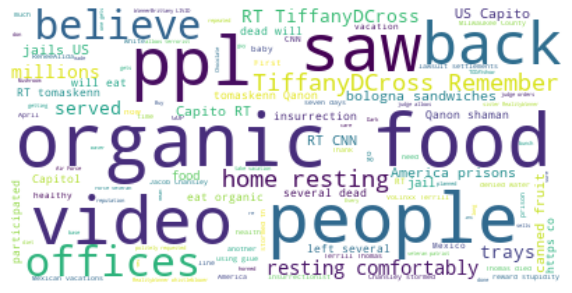

In [75]:
# Generating a word cloud to get a sense of what are the most present words 
reviews_str = df['Tweet Text'].str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
#initializing the tokenizer and a helper function to calculate the sentiment based on the bing liu opinion dictionary.

# this is a time consuming cell. 

tknzr = TweetTokenizer()

pos_list= opinion_lexicon.positive()
neg_list= opinion_lexicon.negative()

def sentiment(sentence):
    senti=0
    words = [word.lower() for word in tknzr.tokenize(sentence)]
    for word in words:
        if word in pos_list:
            senti += 1
        elif word in neg_list:
            senti -= 1
        else:
            senti += 0
    return senti

# saving the opinion score into a new dimension
df['opinion'] = df['Tweet Text'].apply(lambda x : sentiment(x))

In [77]:
# Sorting the data based on the tweet timing and secondary sorting onretweet counts.

sort_df = df.sort_values(by=['Tweet Datetime','Retweets'])

sort_df.head()

,Tweet Text,Tweet Datetime,Twitter @ Name,Retweets,Favorites,Language,Source,opinion
149,RT @TiffanyDCross: Remember- some ppl you just...,2021-02-09 23:07:37,HerHandsMyHands,1426,0,en,Twitter Web App,1
148,RT @CNN: As trays with bologna sandwiches and ...,2021-02-09 23:07:39,piptiegirl,1966,0,en,Twitter for iPhone,0
147,@Qbertglock What about Christians who point il...,2021-02-09 23:07:47,BecauseSoftly,1,1,en,Twitter Web App,-1
146,RT @BecauseSoftly: @Qbertglock What about Chri...,2021-02-09 23:07:53,elzaphan10,1,0,en,NaN,0
145,RT @CNN: As trays with bologna sandwiches and ...,2021-02-09 23:08:09,Doctorb70,1966,0,en,Twitter for iPhone,0


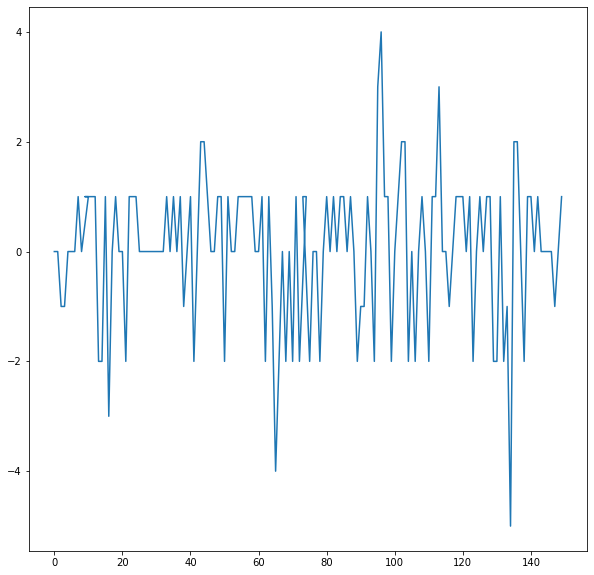

In [78]:
# getting a sense of how the Farmers word is progressing into the tweet sentiments. 
plt.figure(figsize=(10,10))
sort_df['opinion'].plot(kind='line')

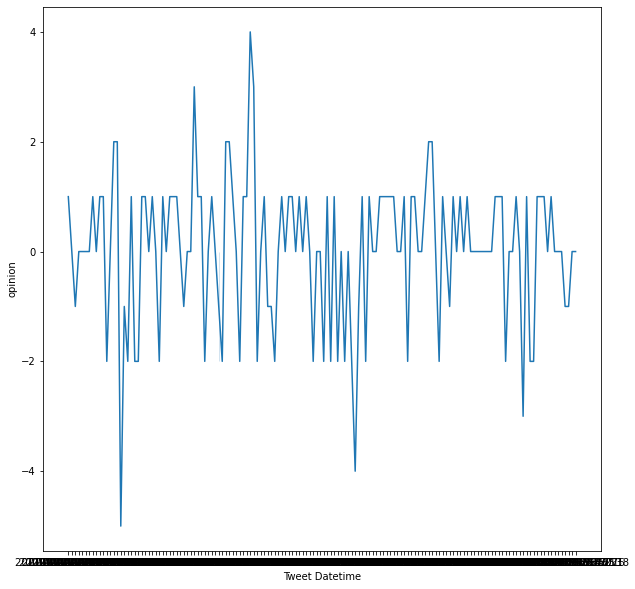

In [79]:
# ploting the time variant opinion if there is any pattern
plt.figure(figsize=(10,10))
sns.lineplot(data=sort_df,x='Tweet Datetime', y='opinion',ax=None)